<a href="https://colab.research.google.com/github/Joshua250304/time-series-visualizer/blob/main/test_module_time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

time_series_visualizer module reloaded.
Generating Line Plot...


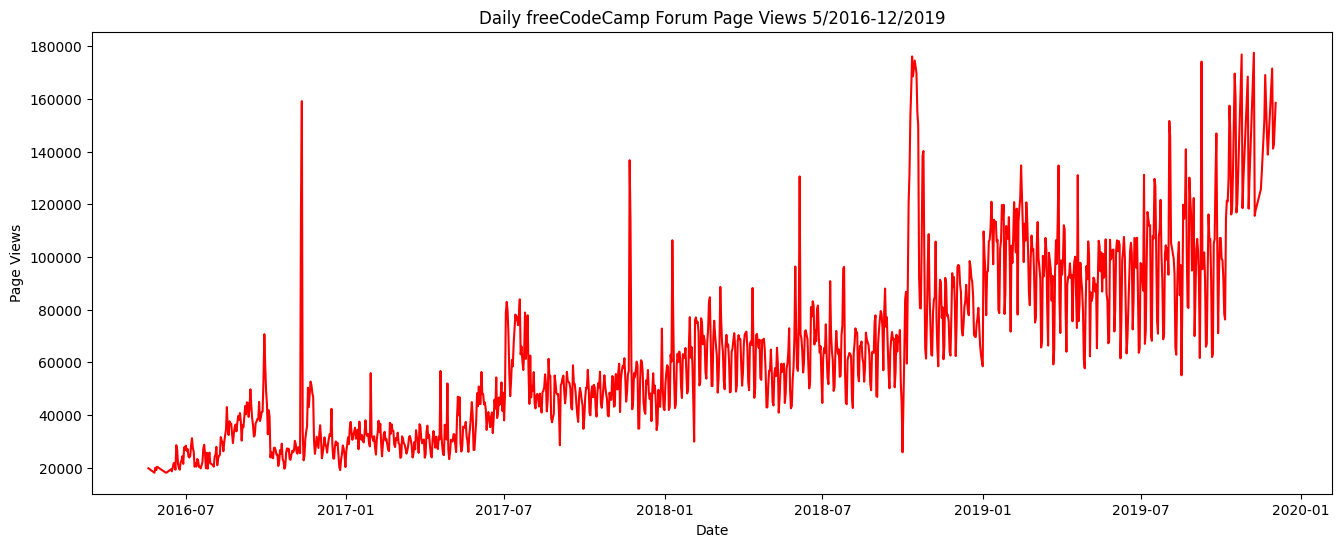

Generating Bar Plot...


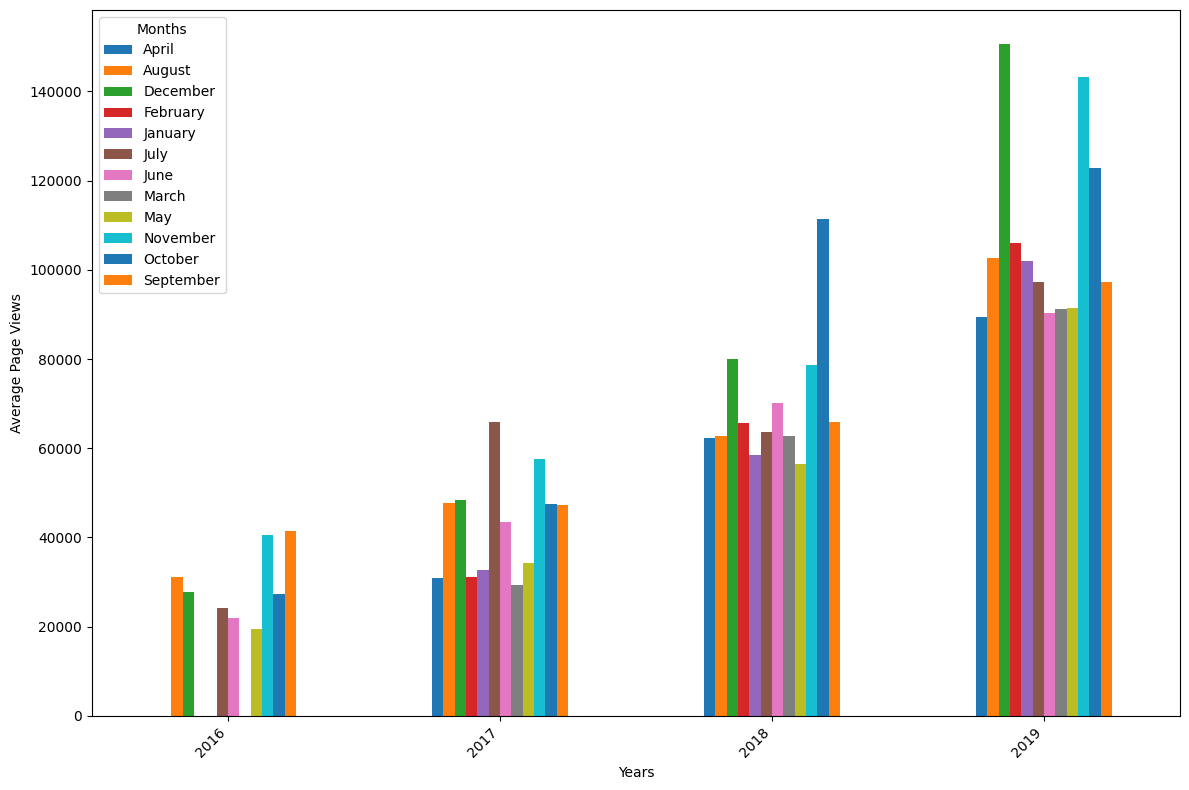

Generating Box Plot...


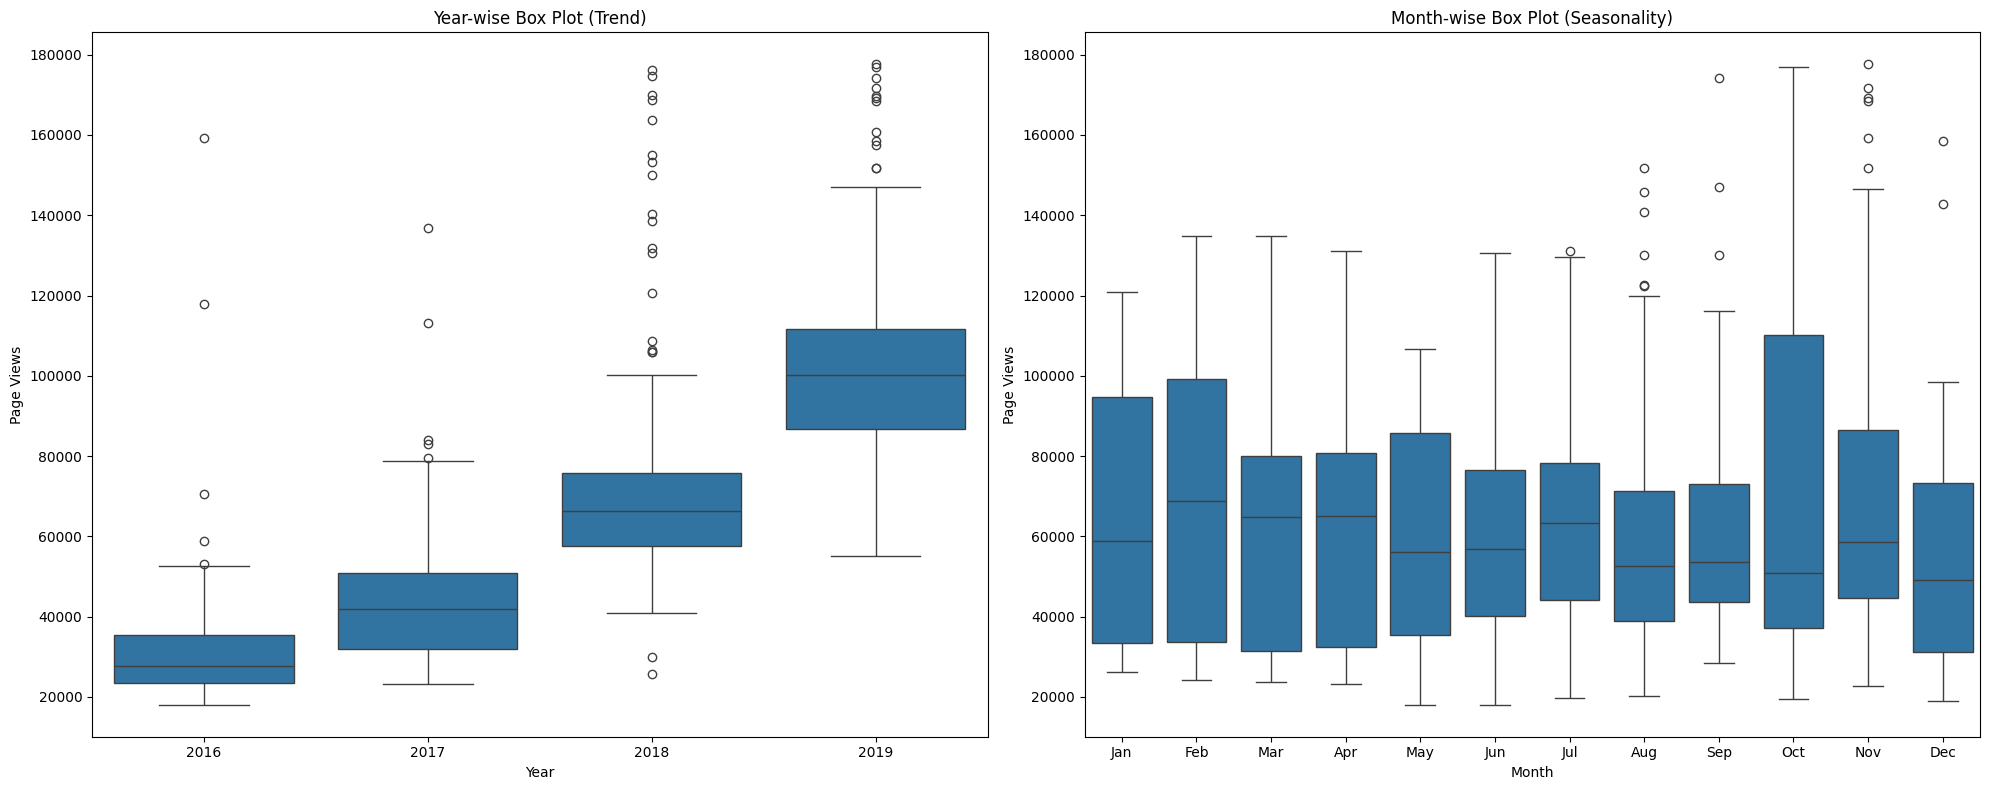

In [12]:
import importlib
import time_series_visualizer
importlib.reload(time_series_visualizer)
print("time_series_visualizer module reloaded.")
import matplotlib.pyplot as plt


# Generate and display plots
print("Generating Line Plot...")
fig_line = time_series_visualizer.draw_line_plot()
plt.show(fig_line)

print("Generating Bar Plot...")
fig_bar = time_series_visualizer.draw_bar_plot()
plt.show(fig_bar)

print("Generating Box Plot...")
fig_box = time_series_visualizer.draw_box_plot()
plt.show(fig_box)


In [9]:
!wget https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv

--2026-02-08 13:53:00--  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22381 (22K) [text/plain]
Saving to: ‘fcc-forum-pageviews.csv.1’

fcc-forum-pageviews 100%[===================>]  21.86K  --.-KB/s    in 0.001s  

2026-02-08 13:53:00 (25.3 MB/s) - ‘fcc-forum-pageviews.csv.1’ saved [22381/22381]



In [5]:
%%writefile time_series_visualizer.py
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Set index to 'Date' column)
df = pd.read_csv('fcc-forum-pageviews.csv',
                 parse_dates=['date'],
                 index_col='date')

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df.index, df['value'], color='red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't modify this part)
    plt.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(12, 8))
    df_bar.plot(kind='bar', ax=ax, legend=True)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.set_title('')
    plt.legend(title='Months')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Save image and return fig (don't modify this part)
    plt.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Year-wise Box Plot (Trend)
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise Box Plot (Seasonality)
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.tight_layout()

    # Save image and return fig (don't modify this part)
    plt.savefig('box_plot.png')
    return fig


Writing time_series_visualizer.py
